Gold price prediction (Random forest regression vs XGBRegressor)

workflow:
1. data collection
2. data pre processing
3. data analysis
4. train test split
5. random forest regressor 
6. model evaluation

In [58]:
# libraries needeed
import numpy as np # numpy arrays
import pandas as pd # pandas Dataframe
import matplotlib.pyplot as plt # graph and plots
import seaborn as sns # data visualization 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Data collection and processing

In [59]:
# loading dataset into pandas Dataframe
gold_data = pd.read_csv('gld_price_data.csv')

In [60]:
# print first 5 rows of datset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Date - date (MM/dd/yyyy format)
SPX - stands for The Standard and Poor's 500 index, or simply the S&P 500. It is a stock market index used for tracking the stock performance of 500 of the largest companies listed on stock exchanges in USA
GLD - gold price
USO - stands for "The United States Oil Fund ® LP (USO)". It is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca
SLV - silver price
EUR/USD - Euro to US dollar exchange ratio

In [61]:
# print last 5 rows of dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [62]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [63]:
# getting some basic information about dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [64]:
# check for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [65]:
# no missing values 

In [66]:
# geting statistcal measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [67]:
correlation = gold_data.corr(numeric_only=True)

<Axes: >

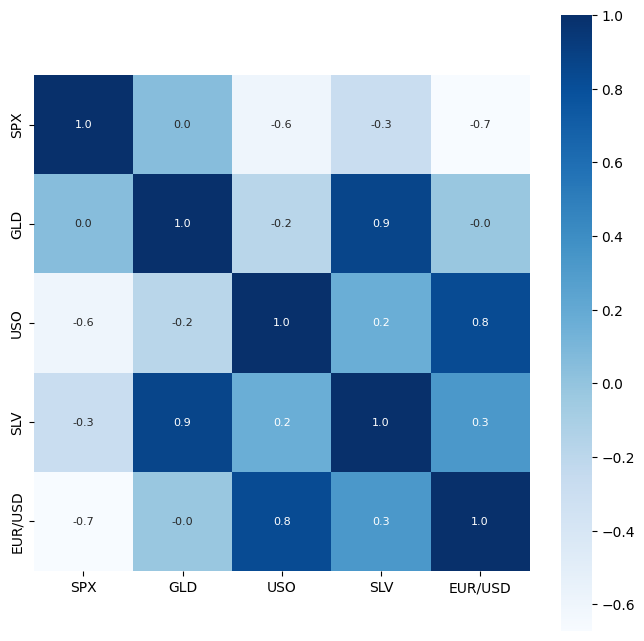

In [68]:
# constructing a heatmap to understand correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')

In [69]:
# good correlation between GLD and SLV.

In [70]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

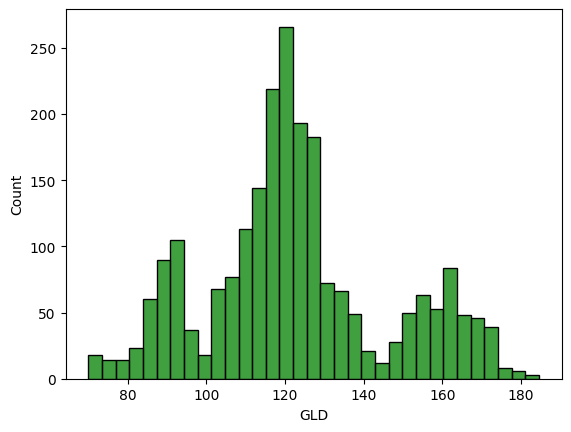

In [71]:
# checking the distibution of GLD price
sns.histplot(gold_data['GLD'], color = 'green')

splitting the features and target

In [72]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [73]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [74]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


train test split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =2)

Model training using random forest algorithm

In [76]:
regressor = RandomForestRegressor(n_estimators=100)

In [77]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

model evaluation

In [78]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.56579916  81.86429985 116.07820016 127.69120081 120.69990132
 154.72319758 150.57979895 125.87190013 117.3496986  126.01950046
 116.70320114 172.43760056 141.80659883 167.37849849 115.19510018
 117.85030079 139.46750338 169.99570044 159.23980281 159.22719912
 155.24110009 125.2222001  175.92349999 157.11320435 125.19260028
  93.764       77.62460041 120.81360008 119.03539883 167.40839961
  88.30220032 125.23909987  91.14420058 117.6851003  121.15599915
 136.8893012  115.3697011  115.30960051 147.59430055 107.53020088
 104.44540258  87.1449978  126.39380024 117.85900002 153.90979874
 119.68659984 108.40400002 108.04599834  93.16900048 127.0558981
  74.89830026 113.56589938 121.15250018 111.29439888 118.85519922
 120.41749944 159.65149987 168.70220153 146.86969696  85.42449841
  94.26690026  86.89389877  90.5773999  119.10010088 126.42430088
 127.39100009 169.88139967 122.26739921 117.53249886  98.65330033
 168.23770073 142.79079796 131.80860211 121.27050209 121.20459953
 119.843100

In [79]:
# R squared error to evaluate model accuracy
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error using Random forest regressor: ", error_score)

R squared error using Random forest regressor:  0.9886631200422569


Compare the actual values vs predicted values in plot

In [80]:
Y_test = list(Y_test) # convert to list

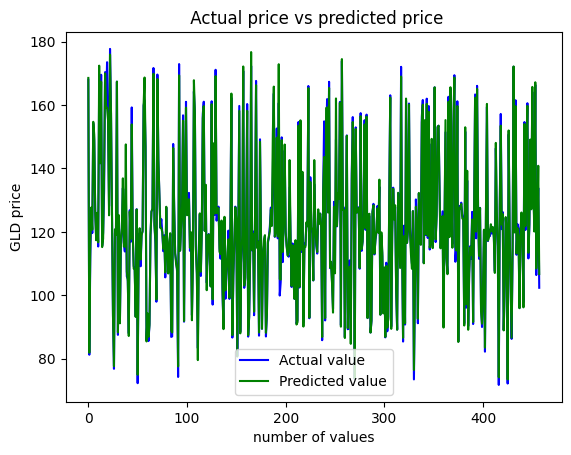

In [81]:
plt.plot(Y_test, color = 'blue', label = 'Actual value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted value')
plt.title(' Actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [82]:
#values are close, predicted value is short by 2% of real value

Model training using XGBRegressor

In [83]:
xgb_regressor = xgb.XGBRegressor()

In [84]:
xgb_regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

model evaluation

In [85]:
# prediction on test data
test_data_prediction = xgb_regressor.predict(X_test)
print(test_data_prediction)

[167.56625   82.741806 114.9159   127.280754 119.89669  154.46346
 148.12573  125.654564 117.13344  126.57594  115.70429  170.20004
 141.28601  166.35875  115.34768  116.55747  132.69386  168.47319
 155.88724  154.56068  154.548    125.083595 175.38089  155.30037
 124.658676  94.86648   73.85175  120.84357  119.05474  167.72997
  87.99669  123.822105  91.20638  117.68014  120.74184  134.09122
 115.27301  114.639725 140.86195  107.93714  104.41204   87.3144
 126.99432  116.56484  159.16661  120.61215  109.652534 108.19997
  93.70222  127.449844  78.94714  112.84591  121.793625 110.50628
 119.08074  119.61162  153.34     168.7827   147.15099   87.00325
  95.19087   86.99271   90.521    118.65545  127.28675  127.387665
 170.31439  122.570175 117.57618   97.008026 168.41344  142.74638
 133.70937  120.53631  123.48939  120.58683  114.15447  117.71427
 107.86178  127.604645 114.03106  106.24436  116.73157  119.58104
  88.86771   88.02252  144.72743  127.938385 113.35239  109.89379
 106.50336

In [86]:
# R squared error to evaluate model accuracy
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error using Random forest regressor: ", error_score)

R squared error using Random forest regressor:  0.9873849231050468


Compare the actual values vs predicted values in plot

In [87]:
Y_test = list(Y_test) # convert to list

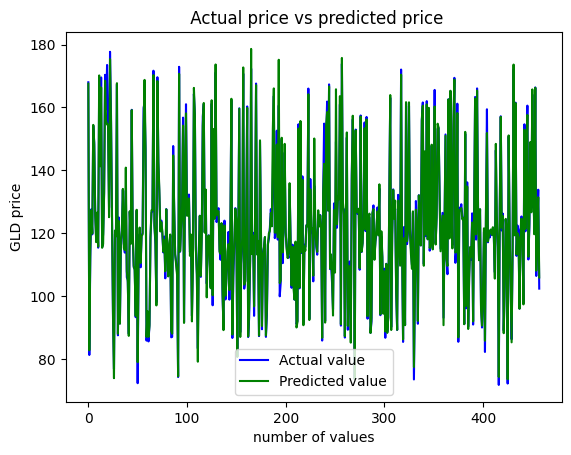

In [88]:
plt.plot(Y_test, color = 'blue', label = 'Actual value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted value')
plt.title(' Actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

Conclusion:
Random forest regression accuracy using R2 squared: ~98.9%
XGBRegression accuracy using R2 squared: ~98.7%